وارد کردن pandas و matplotlib همراه با داده‌ها


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('../../../data/birds.csv')
birds.head()


Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       79.0       2050.0       4050.0   
3                 LC       57.3       64.0       1066.0       1567.0   
4                 LC       64.0       81.0       1930.0       3310.0   

   MinWingspan  MaxWingspan  
0         76.0         94.0  
1         85.0         93.0  
2        135.0        165.0  
3        113.0        116.0  
4        130.0        165.0

بیایید طول بال‌های این پرندگان را با نمایش یک نمودار خطی بسیار ساده تجسم کنیم


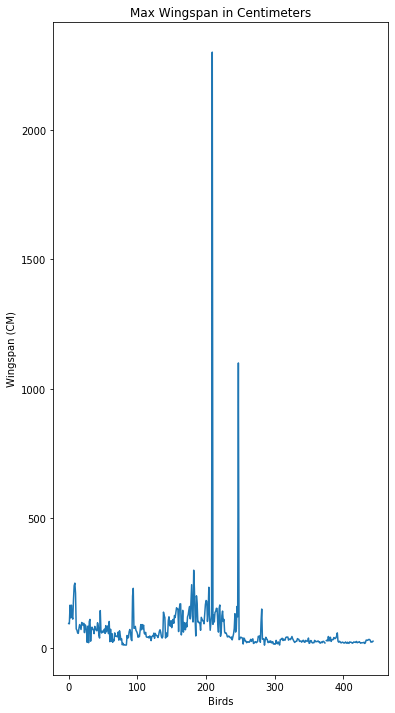

In [19]:

plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
wingspan = birds.MaxWingspan 
wingspan.plot()


نمایش نام پرندگان مرتبط با طول بال‌هایشان


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


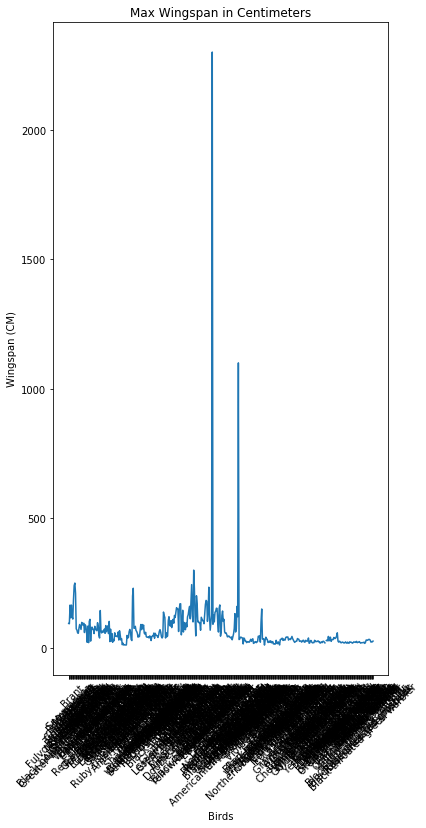

In [20]:

plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.xticks(rotation=45)
x = birds['Name'] 
y = birds['MaxWingspan']

plt.plot(x, y)

plt.show()

پرندگانی را که طول بال‌هایشان به طور خاص بزرگ است و احتمالاً موارد استثنا هستند، برچسب‌گذاری کنید


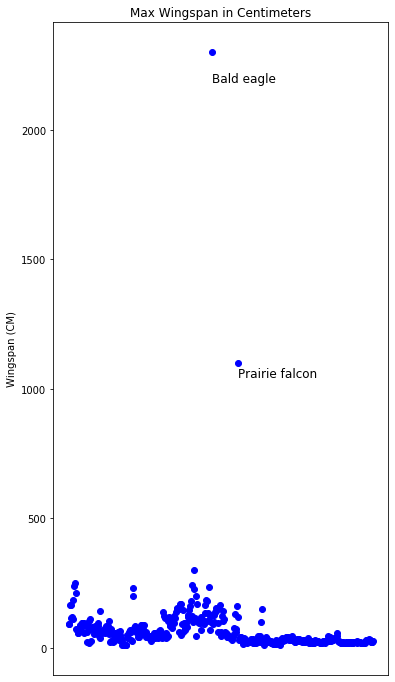

In [21]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=12)
    
plt.show()
    

    


آن موارد پرت را حذف کنید و طول بال‌ها را دوباره رسم کنید


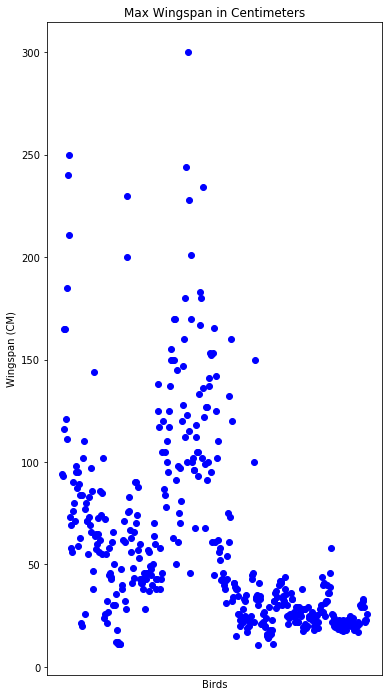

In [22]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()
    

کار با نمودارهای میله‌ای، دسته‌های پرندگان را نشان دهید


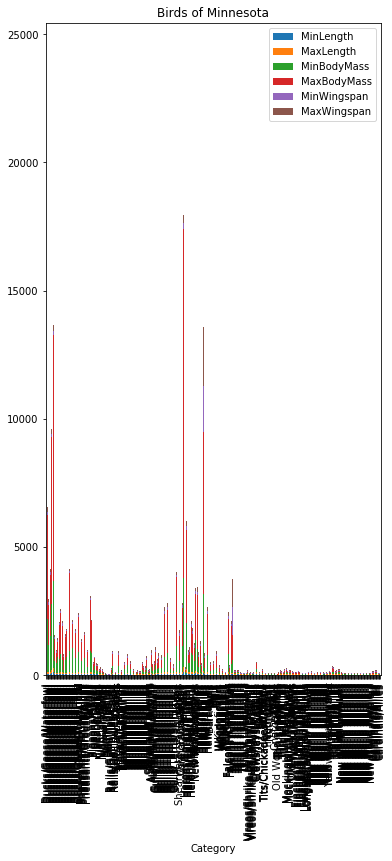

In [23]:
birds.plot(x='Category',
        kind='bar',
        stacked=True,
        title='Birds of Minnesota')

تعداد پرندگان را در دسته‌ها نشان دهید و برچسب‌ها را به صورت افقی نمایش دهید تا بتوانیم نام دسته‌ها را بخوانیم


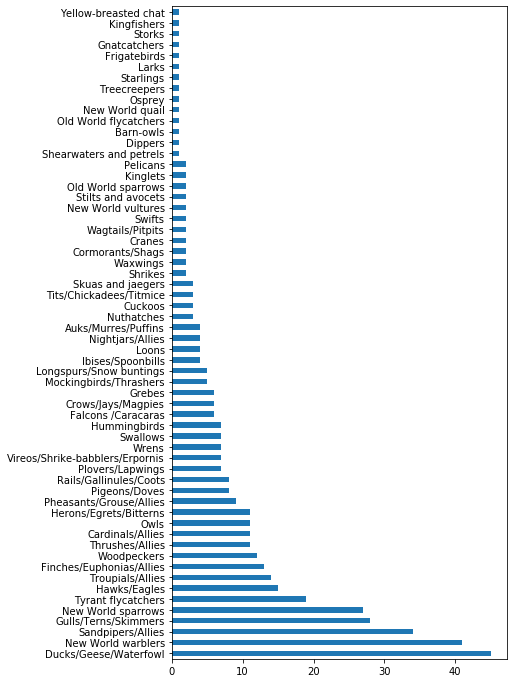

In [42]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

نمایش دسته‌ها با حداکثر طول نمایش داده شده برای هر دسته


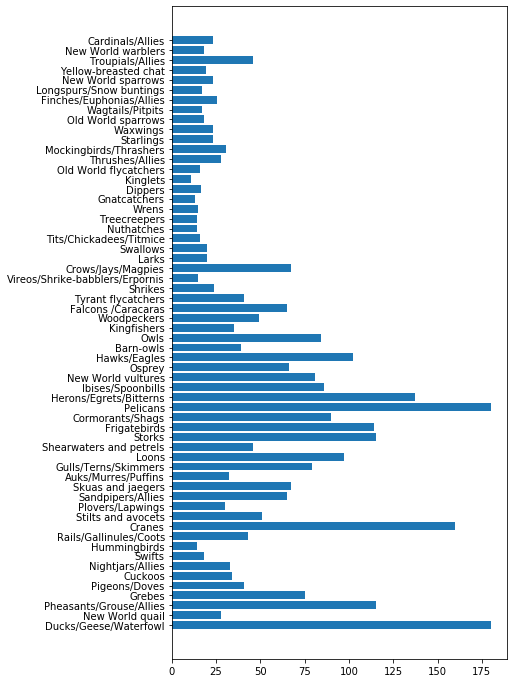

In [43]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = [6, 12]
plt.show()


حداقل و حداکثر طول پرندگان را بر اساس دسته‌بندی‌ها روی هم قرار دهید


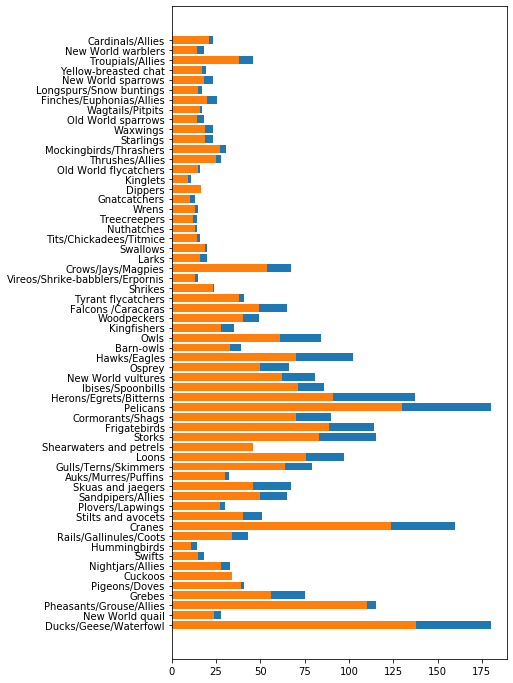

In [77]:
minLength = birds['MinLength']
maxLength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxLength)
plt.barh(category, minLength)

plt.show()


---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
